In [ ]:
!pip install pm4py
import pm4py
if __name__ == "__main__":
      log = pm4py.read_xes('/content/Road_Traffic_Fine_Management_Process.xes')
      directly_follows_graph = pm4py.discover_dfg(log)


parsing log, completed traces ::   0%|          | 0/150370 [00:00<?, ?it/s]

In [ ]:
directly_follows_graph

({('Add penalty', 'Appeal to Judge'): 80,
  ('Add penalty', 'Insert Date Appeal to Prefecture'): 658,
  ('Add penalty', 'Notify Result Appeal to Offender'): 53,
  ('Add penalty', 'Payment'): 18621,
  ('Add penalty', 'Receive Result Appeal from Prefecture'): 351,
  ('Add penalty', 'Send Appeal to Prefecture'): 2915,
  ('Add penalty', 'Send for Credit Collection'): 57182,
  ('Appeal to Judge', 'Add penalty'): 281,
  ('Appeal to Judge', 'Insert Date Appeal to Prefecture'): 15,
  ('Appeal to Judge', 'Notify Result Appeal to Offender'): 9,
  ('Appeal to Judge', 'Payment'): 70,
  ('Appeal to Judge', 'Receive Result Appeal from Prefecture'): 1,
  ('Appeal to Judge', 'Send Appeal to Prefecture'): 9,
  ('Appeal to Judge', 'Send Fine'): 4,
  ('Appeal to Judge', 'Send for Credit Collection'): 32,
  ('Create Fine', 'Appeal to Judge'): 4,
  ('Create Fine', 'Insert Date Appeal to Prefecture'): 22,
  ('Create Fine', 'Payment'): 46952,
  ('Create Fine', 'Send Fine'): 103392,
  ('Insert Date Appeal to 

In [ ]:
log

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola,start_timestamp
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-24,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN,2006-07-24
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-05,NaN,NaN,A1,11.00,NaN,NaN,NaN,NaN,2006-12-05
2,35.0,561,NIL,Create Fine,A,0.0,complete,2006-08-02,157.0,0.0,A100,NaN,NaN,NaN,NaN,NaN,2006-08-02
3,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-12,NaN,NaN,A100,11.00,NaN,NaN,NaN,NaN,2006-12-12
4,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-01-15,NaN,NaN,A100,NaN,P,P,NaN,NaN,2007-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,131.0,25,NIL,Create Fine,A,0.0,complete,2002-09-07,142.0,0.0,V9999,NaN,NaN,NaN,NaN,NaN,2002-09-07
561466,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2002-10-25,NaN,NaN,V9999,15.16,NaN,NaN,NaN,NaN,2002-10-25
561467,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2002-11-04,NaN,NaN,V9999,NaN,P,N,NaN,NaN,2002-11-04
561468,262.0,NaN,NaN,Add penalty,NaN,NaN,complete,2003-01-03,NaN,NaN,V9999,NaN,NaN,NaN,NaN,NaN,2003-01-03


In [ ]:
log.columns

Index(['amount', 'org:resource', 'dismissal', 'concept:name', 'vehicleClass',
       'totalPaymentAmount', 'lifecycle:transition', 'time:timestamp',
       'article', 'points', 'case:concept:name', 'expense', 'notificationType',
       'lastSent', 'paymentAmount', 'matricola', 'start_timestamp'],
      dtype='object')

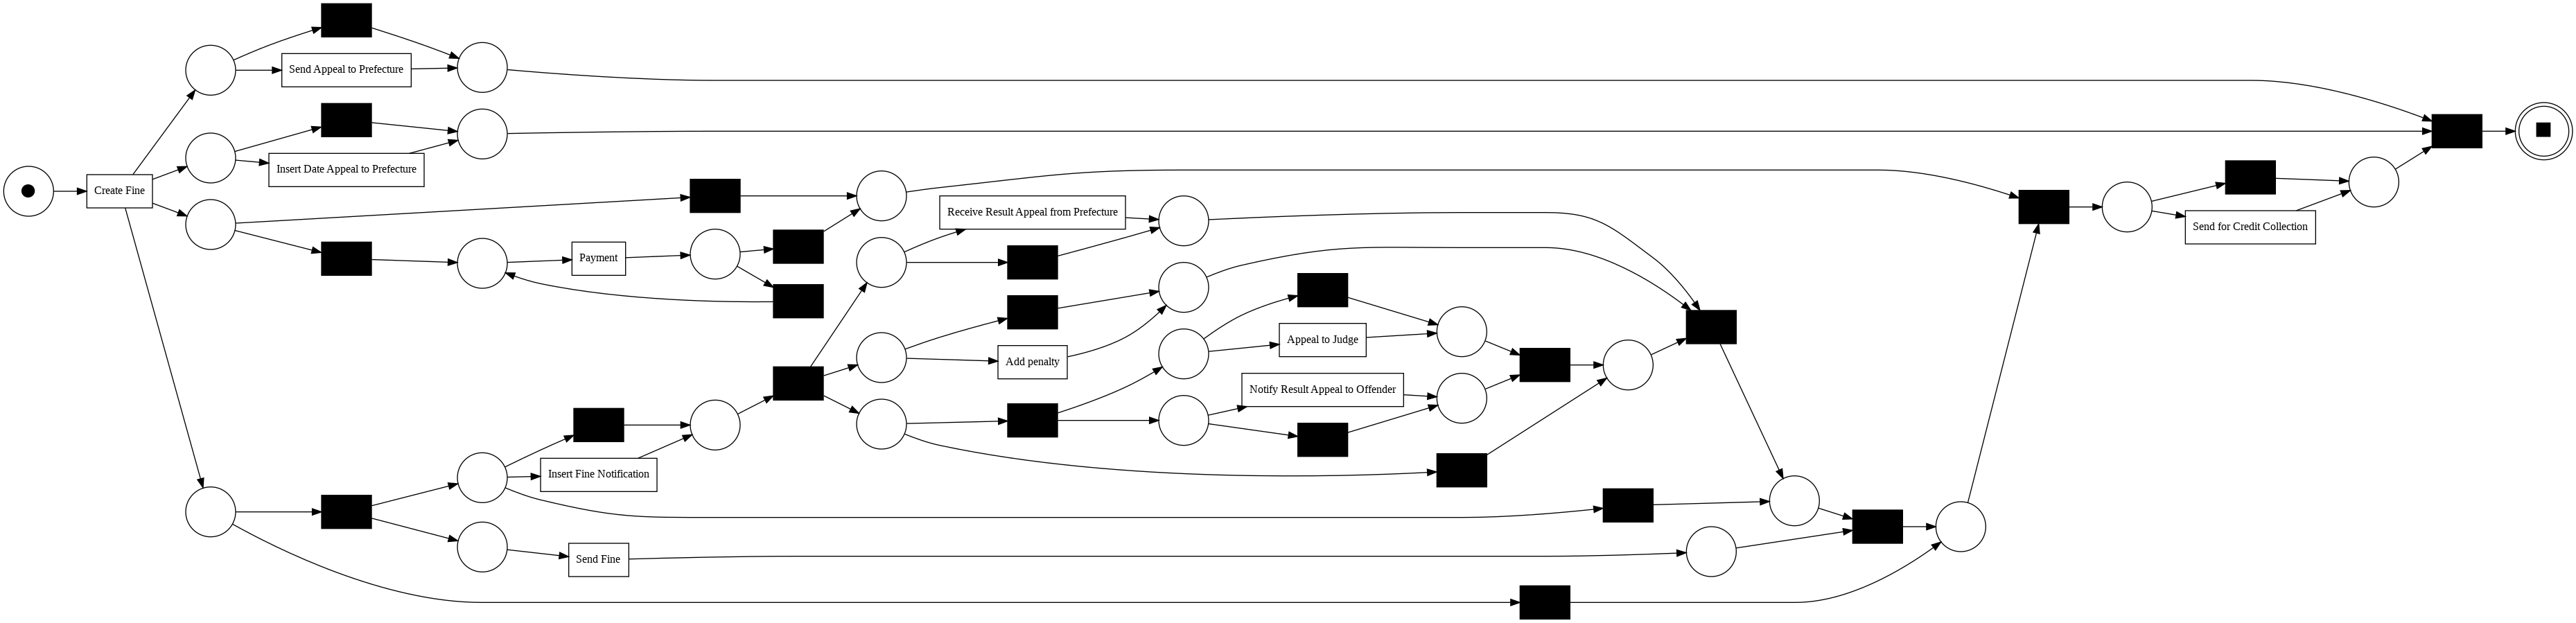

In [ ]:
import pm4py


tree = pm4py.discover_process_tree_inductive(log)
net, im, fm = pm4py.convert_to_petri_net(tree)
pm4py.vis.view_petri_net(net, im, fm)



In [ ]:
net, im, fm = pm4py.discover_petri_net_inductive(
    log
)

In [ ]:
import pm4py
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

if __name__ == "__main__":
    fitness = pm4py.fitness_token_based_replay(log, net, im, fm)
    prec = pm4py.precision_token_based_replay(log, net, im, fm)
    gen = generalization_evaluator.apply(log, net, im, fm)
    simp = simplicity_evaluator.apply(net)

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/271 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

In [ ]:
print("Fitness: ", fitness)
print("Precision: ", prec)
print("Generalization: ", gen)
print("Simplicity: ", simp)

Fitness:  {'perc_fit_traces': 99.85901443107002, 'average_trace_fitness': 0.9999699439787468, 'log_fitness': 0.9999021108296002, 'percentage_of_fitting_traces': 99.85901443107002}
Precision:  0.5081863134118796
Generalization:  0.9833127100418838
Simplicity:  0.6086956521739131


In [ ]:
import pandas as pd

# Daftar kolom
columns_to_group = ['amount', 'org:resource', 'dismissal', 'vehicleClass',
       'time:timestamp',
       'article', 'points', 'case:concept:name', 'notificationType',
       'lastSent', 'matricola',]

# Pastikan kolom tersedia
df = log[columns_to_group]

# Kolom numerik yang ingin dijumlahkan
numeric_cols = ['amount']

# Kolom selain numerik
categorical_cols = [col for col in columns_to_group if col not in numeric_cols and col != 'case:concept:name']

# Gabungkan per case:concept:name
agg_dict = {col: 'sum' for col in numeric_cols}
agg_dict.update({col: lambda x: " > ".join(x.dropna().astype(str)) for col in categorical_cols})

# Grouping
grouped_df = df.groupby("case:concept:name").agg(agg_dict).reset_index()

# Lihat hasil
print(grouped_df.head())


  case:concept:name  amount org:resource dismissal vehicleClass  \
0                A1    35.0          561       NIL            A   
1              A100   106.5          561       NIL            A   
2            A10000   110.0          561       NIL            A   
3            A10001   110.0          537   NIL > #            A   
4            A10004   110.0          537       NIL            A   

                                      time:timestamp article points  \
0                            2006-07-24 > 2006-12-05   157.0    0.0   
1  2006-08-02 > 2006-12-12 > 2007-01-15 > 2007-03...   157.0    0.0   
2  2007-03-09 > 2007-07-17 > 2007-08-02 > 2007-10...   157.0    0.0   
3  2007-03-19 > 2007-07-17 > 2007-07-25 > 2007-08...   157.0    0.0   
4  2007-03-20 > 2007-07-17 > 2007-07-24 > 2007-09...   157.0    0.0   

  notificationType lastSent matricola  
0                                      
1                P        P            
2                P        P            
3         

In [ ]:
grouped_df = grouped_df.drop(columns=["lastSent", "notificationType","matricola"])


In [ ]:
import pandas as pd

# Fungsi untuk menghitung durasi dari urutan timestamp string
def compute_duration(ts_string):
    try:
        timestamps = [pd.to_datetime(t.strip()) for t in ts_string.split(">") if t.strip()]
        if len(timestamps) >= 2:
            return (max(timestamps) - min(timestamps)).days  # hasil dalam satuan hari
        else:
            return 0
    except:
        return None  # jika ada error parsing

# Terapkan ke kolom time:timestamp
grouped_df["duration"] = grouped_df["time:timestamp"].apply(compute_duration)

# Tampilkan hasil
print(grouped_df[["case:concept:name", "duration"]].head())


  case:concept:name  duration
0                A1       134
1              A100       971
2            A10000       550
3            A10001       189
4            A10004       741


In [ ]:
# Hitung jumlah aktivitas berdasarkan jumlah elemen yang dipisahkan oleh '>'
grouped_df["activityCount"] = grouped_df["time:timestamp"].apply(
    lambda x: len([act.strip() for act in x.split(">") if act.strip()])
)

# Tampilkan hasil
print(grouped_df[["case:concept:name", "activityCount"]].head())


  case:concept:name  activityCount
0                A1              2
1              A100              5
2            A10000              5
3            A10001              6
4            A10004              5


In [ ]:
def clean_dismissal(value):
    if pd.isna(value):
        return None
    parts = [v.strip() for v in value.split(">") if v.strip()]
    non_nil = [p for p in parts if p.upper() != "NIL"]
    return non_nil[0] if non_nil else parts[0] if parts else None

# Terapkan ke kolom dismissal
grouped_df["dismissal"] = grouped_df["dismissal"].apply(clean_dismissal)

# Tampilkan contoh
print(grouped_df[["case:concept:name", "dismissal"]].head())


  case:concept:name dismissal
0                A1       NIL
1              A100       NIL
2            A10000       NIL
3            A10001         #
4            A10004       NIL


In [ ]:
grouped_df.columns

Index(['case:concept:name', 'amount', 'org:resource', 'dismissal',
       'vehicleClass', 'time:timestamp', 'article', 'points', 'duration',
       'activityCount'],
      dtype='object')

In [ ]:
grouped_df

,case:concept:name,amount,org:resource,dismissal,vehicleClass,time:timestamp,article,points,duration,activityCount
0,A1,35.0,561,NIL,A,2006-07-24 > 2006-12-05,157.0,0.0,134,2
1,A100,106.5,561,NIL,A,2006-08-02 > 2006-12-12 > 2007-01-15 > 2007-03...,157.0,0.0,971,5
2,A10000,110.0,561,NIL,A,2007-03-09 > 2007-07-17 > 2007-08-02 > 2007-10...,157.0,0.0,550,5
3,A10001,110.0,537,#,A,2007-03-19 > 2007-07-17 > 2007-07-25 > 2007-08...,157.0,0.0,189,6
4,A10004,110.0,537,NIL,A,2007-03-20 > 2007-07-17 > 2007-07-24 > 2007-09...,157.0,0.0,741,5
...,...,...,...,...,...,...,...,...,...,...
150365,V9995,393.0,25,NIL,A,2002-09-07 > 2002-10-25 > 2002-11-05 > 2003-01...,142.0,0.0,490,5
150366,V9996,131.0,25,NIL,A,2002-09-07 > 2002-10-25 > 2002-11-06,142.0,0.0,60,3
150367,V9997,393.0,25,NIL,M,2002-09-07 > 2002-10-25 > 2002-11-04 > 2003-01...,142.0,0.0,490,5
150368,V9998,393.0,25,NIL,A,2002-09-07 > 2002-10-25 > 2002-10-31 > 2002-12...,142.0,0.0,490,5


In [ ]:
df_ready=grouped_df[['case:concept:name', 'amount', 'org:resource', 'dismissal',
       'vehicleClass', 'points','duration','activityCount' ]]

In [ ]:
df_ready.to_csv('df_ready.csv', index=False)

In [ ]:
import pandas as pd
df_ready=pd.read_csv('/content/df_ready.csv')

In [ ]:
df_ready

,case:concept:name,amount,org:resource,dismissal,vehicleClass,points,duration,activityCount
0,A1,35.0,561,NIL,A,0.0,134,2
1,A100,106.5,561,NIL,A,0.0,971,5
2,A10000,110.0,561,NIL,A,0.0,550,5
3,A10001,110.0,537,#,A,0.0,189,6
4,A10004,110.0,537,NIL,A,0.0,741,5
...,...,...,...,...,...,...,...,...
150365,V9995,393.0,25,NIL,A,0.0,490,5
150366,V9996,131.0,25,NIL,A,0.0,60,3
150367,V9997,393.0,25,NIL,M,0.0,490,5
150368,V9998,393.0,25,NIL,A,0.0,490,5


In [ ]:
df_ready['last_activity'] = df_ready['concept:name'].apply(lambda x: x.split(' > ')[-1])

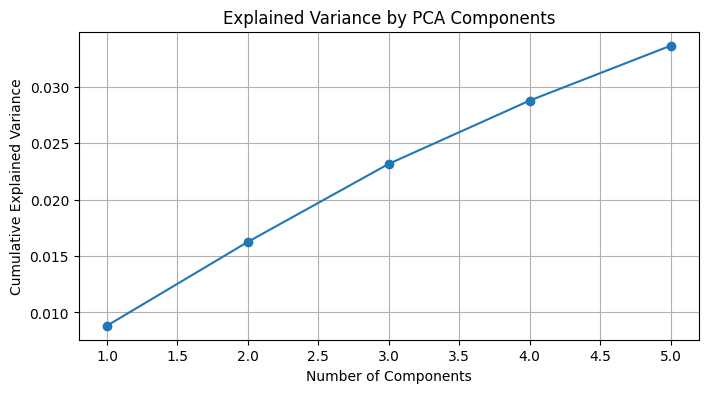

Top contributing features to PC1:
                 PC1 Weight
activityCount      0.410044
amount             0.385233
vehicleClass_A     0.374060
duration           0.331222
vehicleClass_C     0.288770
dismissal_NIL      0.259029
dismissal_#        0.242334
points             0.241647
vehicleClass_M     0.235769
org:resource_29    0.125562


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Asumsikan df_ready sudah tersedia
# ['case:concept:name', 'amount', 'org:resource', 'dismissal',
#  'vehicleClass', 'points', 'duration', 'activityCount']

# Pisahkan fitur dan ID
features = df_ready.drop(columns=['case:concept:name'])

# One-hot encoding untuk kolom kategorikal
features_encoded = pd.get_dummies(features, columns=['org:resource', 'dismissal', 'vehicleClass'])

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_encoded)

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Plot variansi yang dijelaskan
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Tampilkan kontribusi fitur terhadap komponen pertama
pca_components = pd.DataFrame(pca.components_[0], index=features_encoded.columns, columns=["PC1 Weight"])
top_features = pca_components.abs().sort_values(by="PC1 Weight", ascending=False).head(10)
print("Top contributing features to PC1:")
print(top_features)


In [ ]:
# prompt: select column that has pc1 weight>0,3

# Pilih kolom dengan bobot PC1 > 0.3
significant_pc1_features = pca_components[pca_components["PC1 Weight"].abs() >= 0.2]

print("\nFeatures with |PC1 Weight| > 0.3:")
print(significant_pc1_features)

# Anda bisa mendapatkan nama kolom ini
selected_columns = significant_pc1_features.index.tolist()
print("\nNames of features with |PC1 Weight| > 0.3:")
selected_columns



# Pilih fitur teratas dari PC1

X_selected = features_encoded[selected_columns]

# Standardisasi ulang
X_selected_scaled = scaler.fit_transform(X_selected)


Features with |PC1 Weight| > 0.3:
                PC1 Weight
amount            0.385233
points            0.241647
duration          0.331222
activityCount     0.410044
dismissal_#       0.242334
dismissal_NIL    -0.259029
vehicleClass_A   -0.374060
vehicleClass_C    0.288770
vehicleClass_M    0.235769

Names of features with |PC1 Weight| > 0.3:


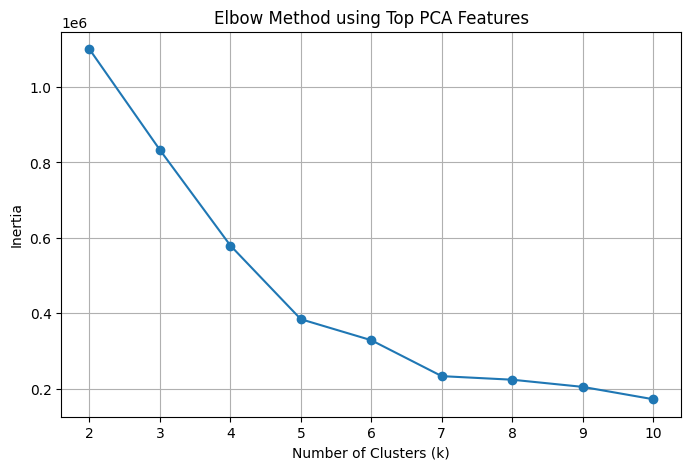

In [ ]:
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertias, marker='o')
plt.title("Elbow Method using Top PCA Features")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
# prompt: hitung sillhoutte score untuk k=5,8,9

from sklearn.metrics import silhouette_score

k_values = [5, 7, 8, 9]
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress future warning
    labels = kmeans.fit_predict(X_selected_scaled)
    score = silhouette_score(X_selected_scaled, labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for k={k}: {score}")

# You can also store and plot these scores if needed
# print("\nSilhouette Scores:", silhouette_scores)

Silhouette Score for k=5: 0.6849637237065472
Silhouette Score for k=7: 0.7220483555629928
Silhouette Score for k=8: 0.7314109351721277


In [ ]:
# prompt: hitung sillhoutte score untuk k=5,8,9

from sklearn.metrics import silhouette_score

k_values = [ 9]
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress future warning
    labels = kmeans.fit_predict(X_selected_scaled)
    score = silhouette_score(X_selected_scaled, labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for k={k}: {score}")

# You can also store and plot these scores if needed
# print("\nSilhouette Scores:", silhouette_scores)

Silhouette Score for k=9: 0.6435966632064927


In [ ]:
# Misal kita pilih k=3
k_optimal = 8
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_ready["cluster"] = kmeans.fit_predict(X_selected_scaled)




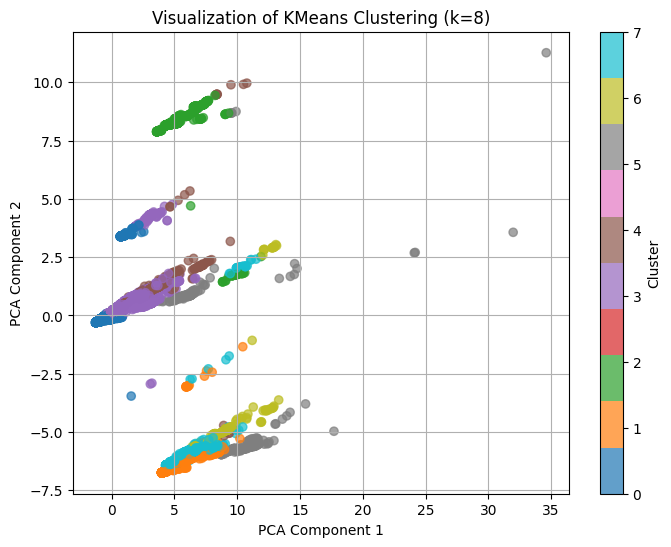

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi ke 2D untuk visualisasi
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_selected_scaled)

# Plot hasil clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_ready["cluster"], cmap="tab10", alpha=0.7)
plt.title("Visualization of KMeans Clustering (k=" + str(k_optimal) + ")")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Asumsikan:
# - log adalah DataFrame event log awal
# - df_ready berisi kolom ['case:concept:name', ..., 'cluster']

# Gabungkan cluster ke log awal berdasarkan case:concept:name
log_with_cluster = log.merge(
    df_ready[['case:concept:name', 'cluster']],
    on='case:concept:name',
    how='left'
)

# Cek hasil
print(log_with_cluster[['case:concept:name', 'concept:name', 'cluster']].head())


  case:concept:name              concept:name  cluster
0                A1               Create Fine        0
1                A1                 Send Fine        0
2              A100               Create Fine        3
3              A100                 Send Fine        3
4              A100  Insert Fine Notification        3


In [ ]:
log_with_cluster

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola,start_timestamp,cluster
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-24,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN,2006-07-24,0
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-05,NaN,NaN,A1,11.00,NaN,NaN,NaN,NaN,2006-12-05,0
2,35.0,561,NIL,Create Fine,A,0.0,complete,2006-08-02,157.0,0.0,A100,NaN,NaN,NaN,NaN,NaN,2006-08-02,3
3,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-12,NaN,NaN,A100,11.00,NaN,NaN,NaN,NaN,2006-12-12,3
4,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-01-15,NaN,NaN,A100,NaN,P,P,NaN,NaN,2007-01-15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,131.0,25,NIL,Create Fine,A,0.0,complete,2002-09-07,142.0,0.0,V9999,NaN,NaN,NaN,NaN,NaN,2002-09-07,3
561466,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2002-10-25,NaN,NaN,V9999,15.16,NaN,NaN,NaN,NaN,2002-10-25,3
561467,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2002-11-04,NaN,NaN,V9999,NaN,P,N,NaN,NaN,2002-11-04,3
561468,262.0,NaN,NaN,Add penalty,NaN,NaN,complete,2003-01-03,NaN,NaN,V9999,NaN,NaN,NaN,NaN,NaN,2003-01-03,3


In [ ]:
# Pastikan 'merged_log' sudah berisi kolom 'cluster' dan 'case_id'
clustered_logs = {}

for cluster_id in log_with_cluster["cluster"].unique():
    clustered_logs[f"cluster_{cluster_id}"] = log_with_cluster[log_with_cluster["cluster"] == cluster_id].copy()

# Contoh: tampilkan isi log dari cluster 0
clustered_logs["cluster_0"].head()


,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola,start_timestamp,cluster
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-24,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN,2006-07-24,0
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-05,NaN,NaN,A1,11.0,NaN,NaN,NaN,NaN,2006-12-05,0
23,36.0,537,NIL,Create Fine,A,0.0,complete,2007-03-20,157.0,0.0,A10005,NaN,NaN,NaN,NaN,NaN,2007-03-20,0
24,NaN,NaN,NaN,Payment,NaN,36.0,complete,2007-03-21,NaN,NaN,A10005,NaN,NaN,NaN,36.0,NaN,2007-03-21,0
25,36.0,537,NIL,Create Fine,A,0.0,complete,2007-03-20,157.0,0.0,A10007,NaN,NaN,NaN,NaN,NaN,2007-03-20,0


In [ ]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

import pandas as pd

# Simpan hasil evaluasi di list
evaluation_results = []
event_log_cluster=[]

for cluster_id, cluster_df in clustered_logs.items():



    # Konversi ke PM4Py event log
    event_log = log_converter.apply(cluster_df, parameters={
        log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: "case:concept:name"
    }, variant=log_converter.Variants.TO_EVENT_LOG)

    event_log_cluster.append(event_log)
    # Process discovery dengan Inductive Miner
    net, im, fm = pm4py.discover_petri_net_inductive(
    event_log
   )

    # Evaluasi model
    fitness = pm4py.fitness_token_based_replay(event_log, net, im, fm)
    prec = pm4py.precision_token_based_replay(event_log, net, im, fm)
    gen = generalization_evaluator.apply(event_log, net, im, fm)
    simp = simplicity_evaluator.apply(net)

    evaluation_results.append({
        "cluster": cluster_id,
        "fitness": fitness,
        "precision": prec,
        "generalization": gen,
        "simplicity": simp
    })

# Tampilkan hasil evaluasi
results_df = pd.DataFrame(evaluation_results)
print(results_df)


replaying log with TBR, completed traces ::   0%|          | 0/13 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/13 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/203 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/241 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/203 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/18 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/32 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/18 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/39 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/39 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/30 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/45 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/30 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/22 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/51 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/22 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/47 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/57 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/47 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/18 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/30 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/18 [00:00<?, ?it/s]

     cluster                                            fitness  precision  \
0  cluster_0  {'perc_fit_traces': 100.0, 'average_trace_fitn...   0.829235   
1  cluster_3  {'perc_fit_traces': 100.0, 'average_trace_fitn...   0.617987   
2  cluster_2  {'perc_fit_traces': 100.0, 'average_trace_fitn...   0.507274   
3  cluster_1  {'perc_fit_traces': 100.0, 'average_trace_fitn...   0.414030   
4  cluster_7  {'perc_fit_traces': 100.0, 'average_trace_fitn...   0.621628   
5  cluster_5  {'perc_fit_traces': 100.0, 'average_trace_fitn...   0.802045   
6  cluster_4  {'perc_fit_traces': 100.0, 'average_trace_fitn...   0.412882   
7  cluster_6  {'perc_fit_traces': 100.0, 'average_trace_fitn...   0.893550   

   generalization  simplicity  
0        0.897398    0.680000  
1        0.954986    0.638095  
2        0.713853    0.655172  
3        0.889836    0.610390  
4        0.829578    0.636364  
5        0.830620    0.725490  
6        0.841403    0.625000  
7        0.772270    0.684211  


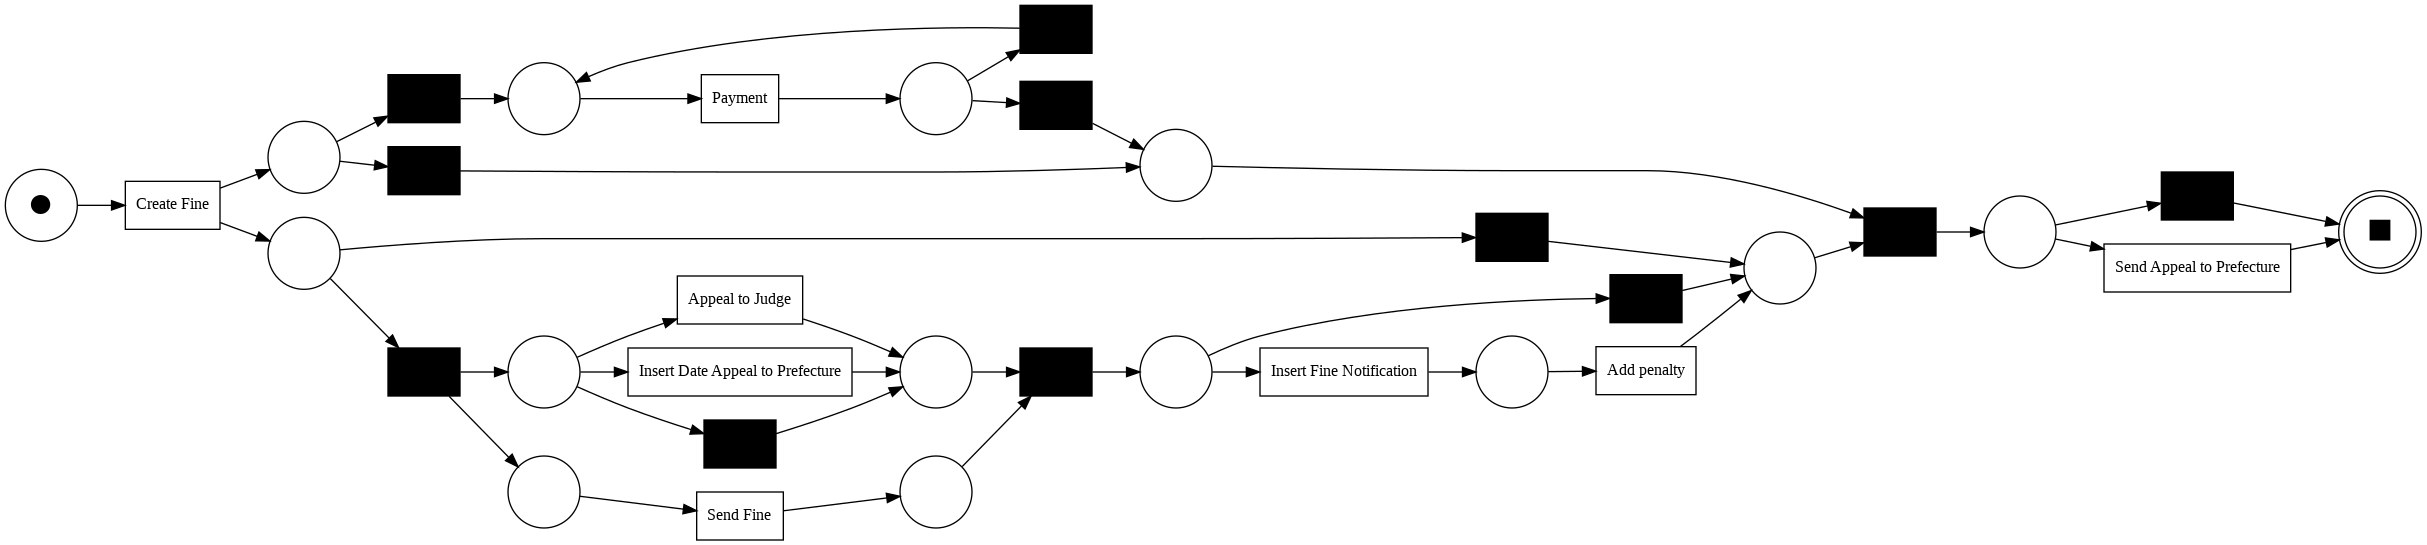

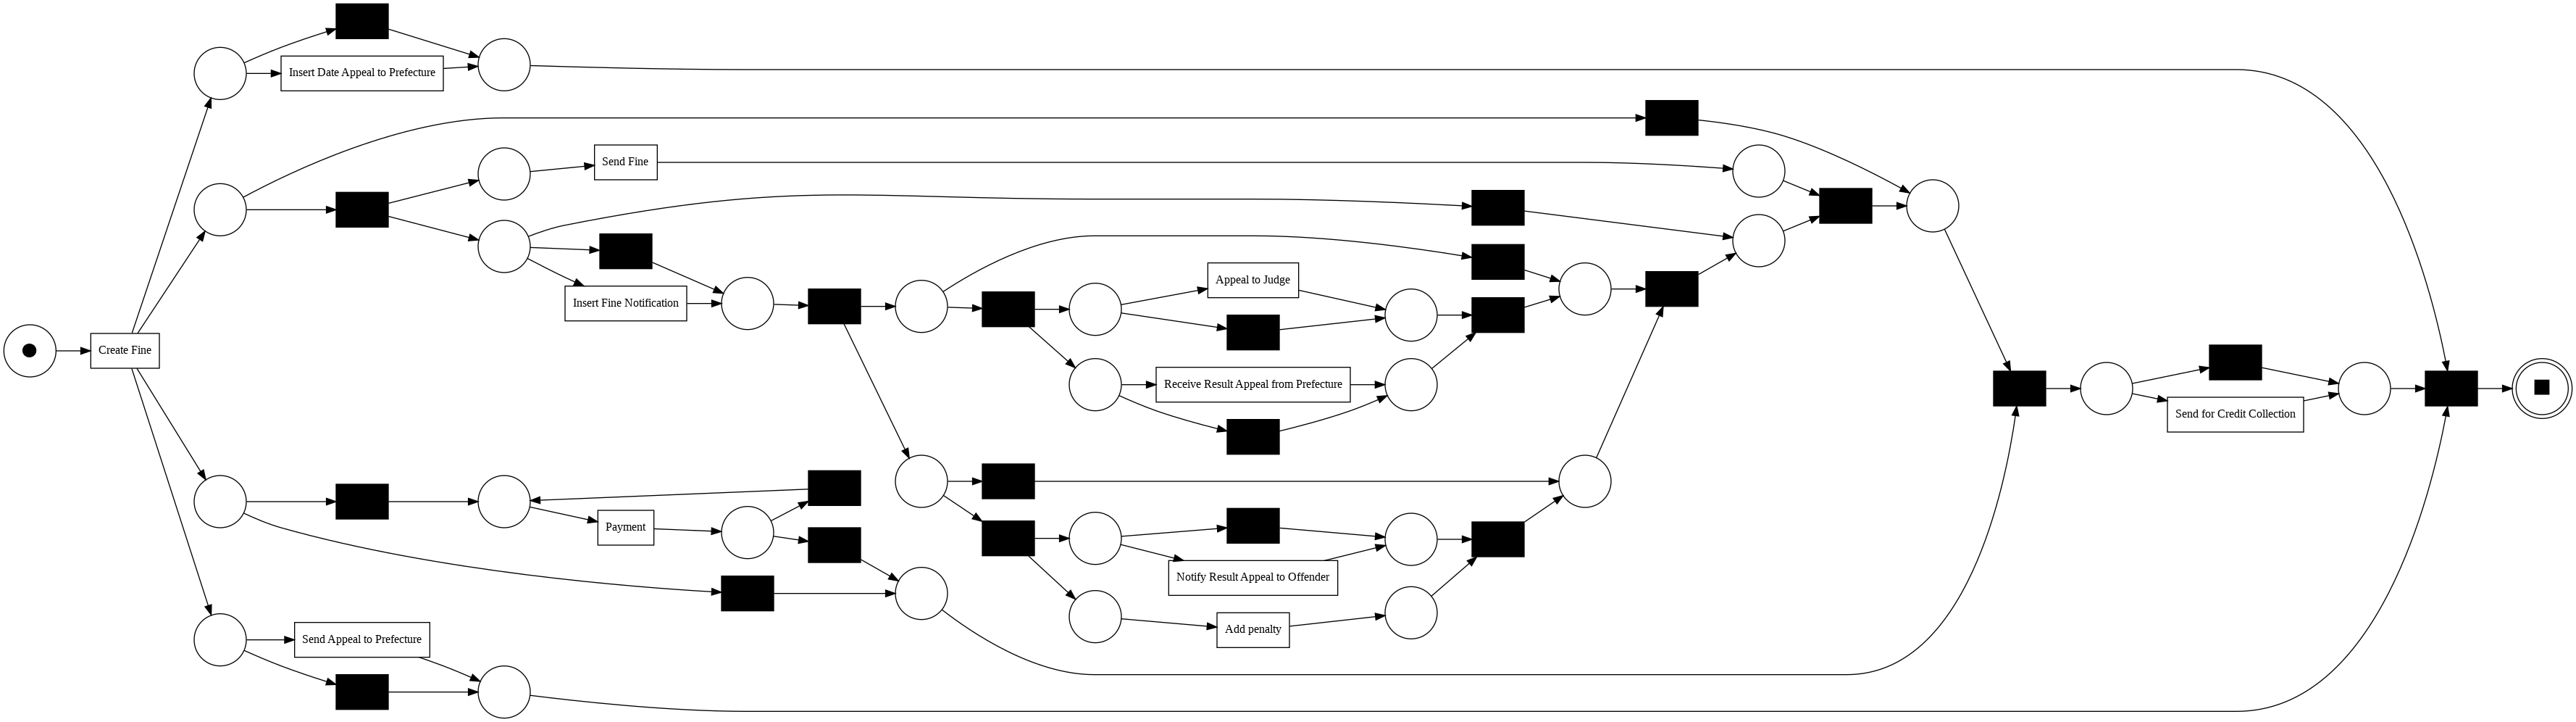

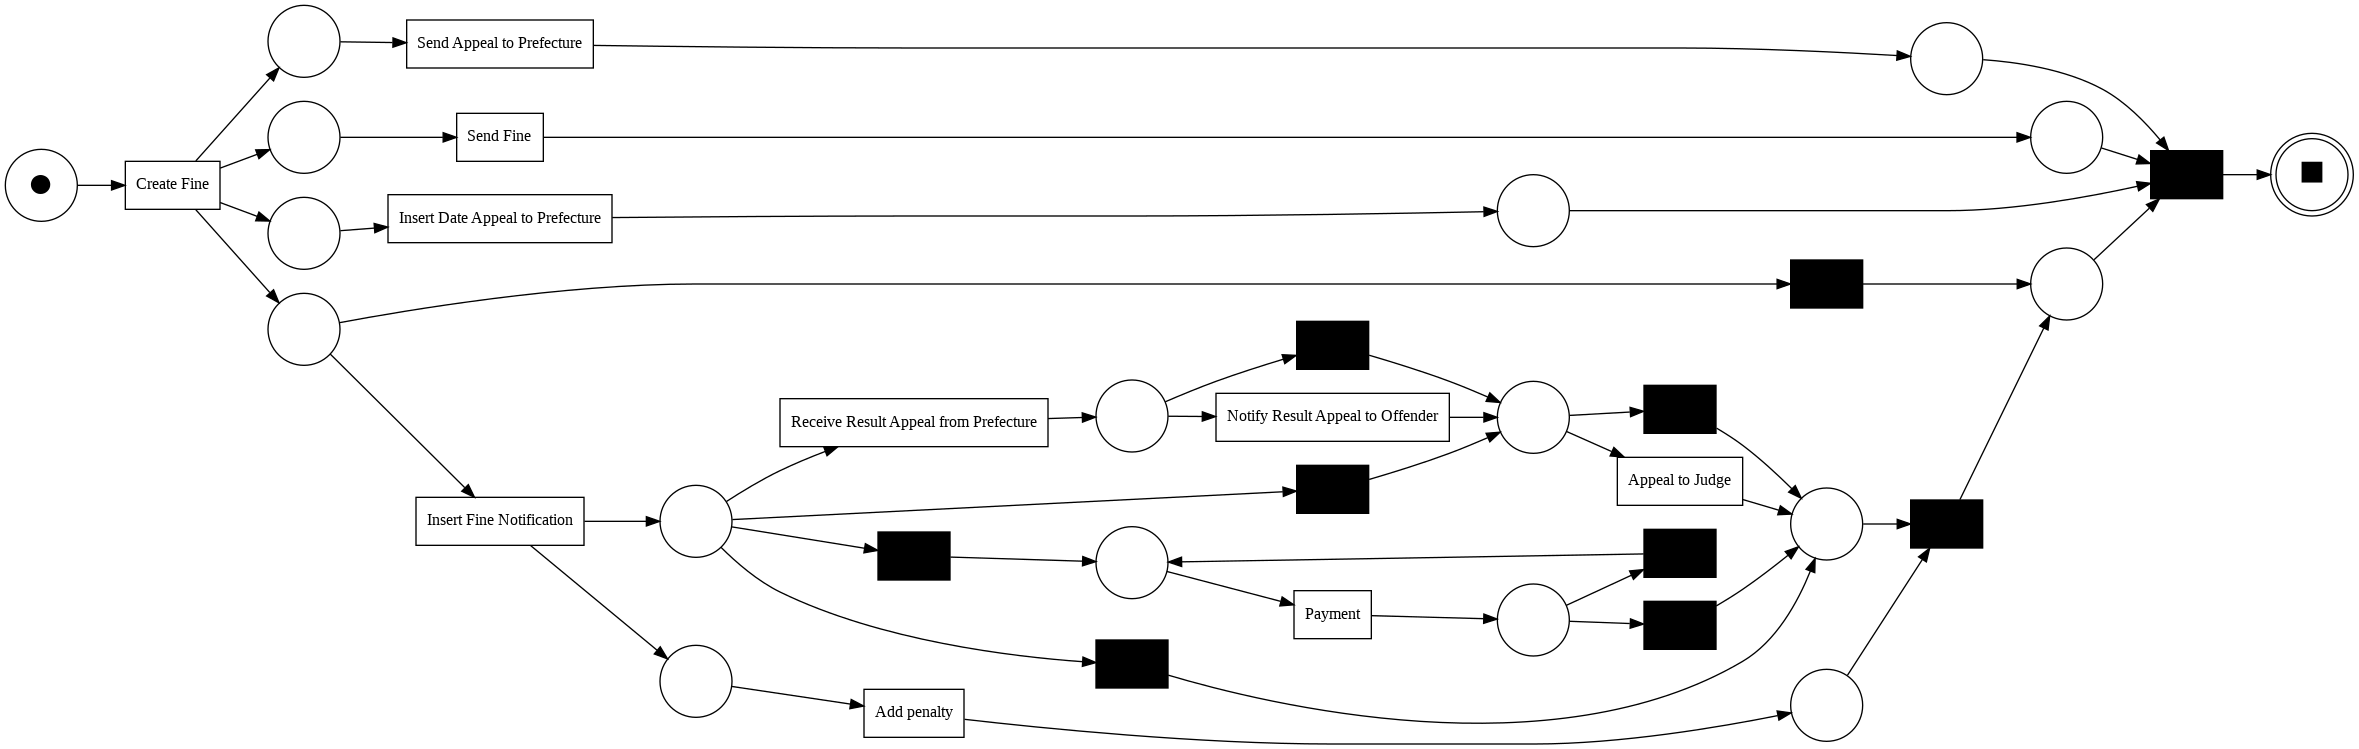

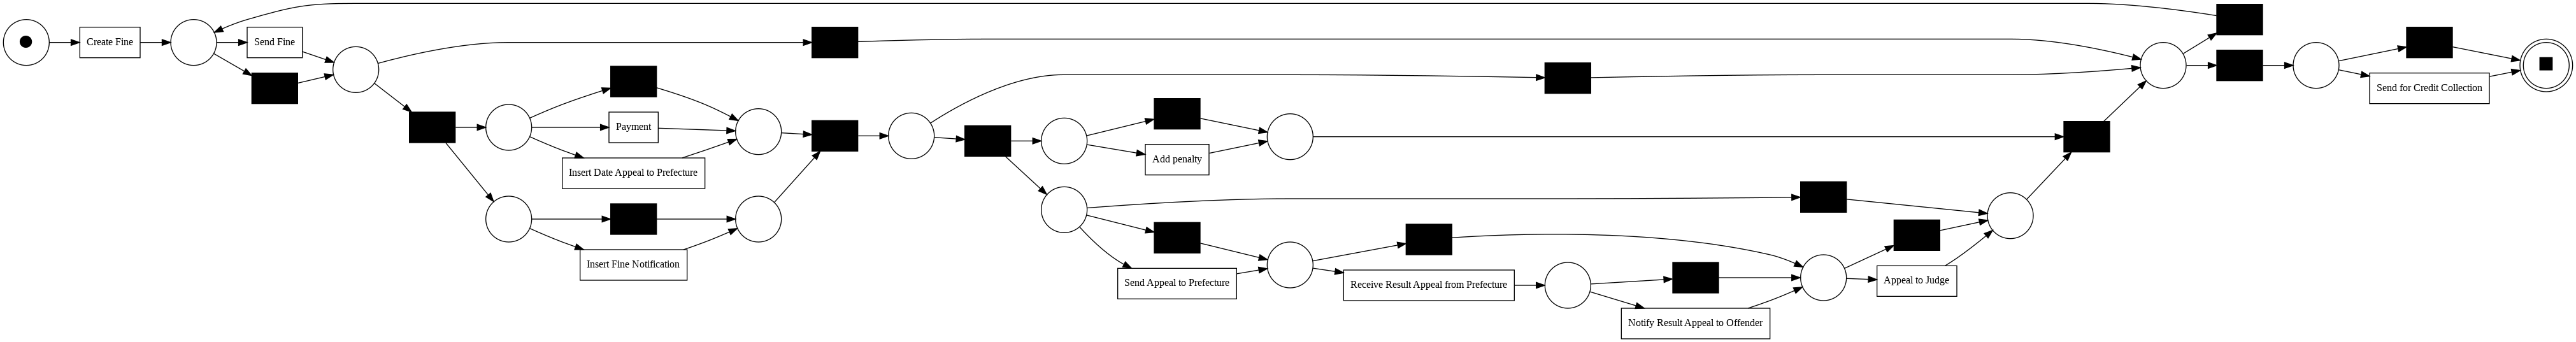

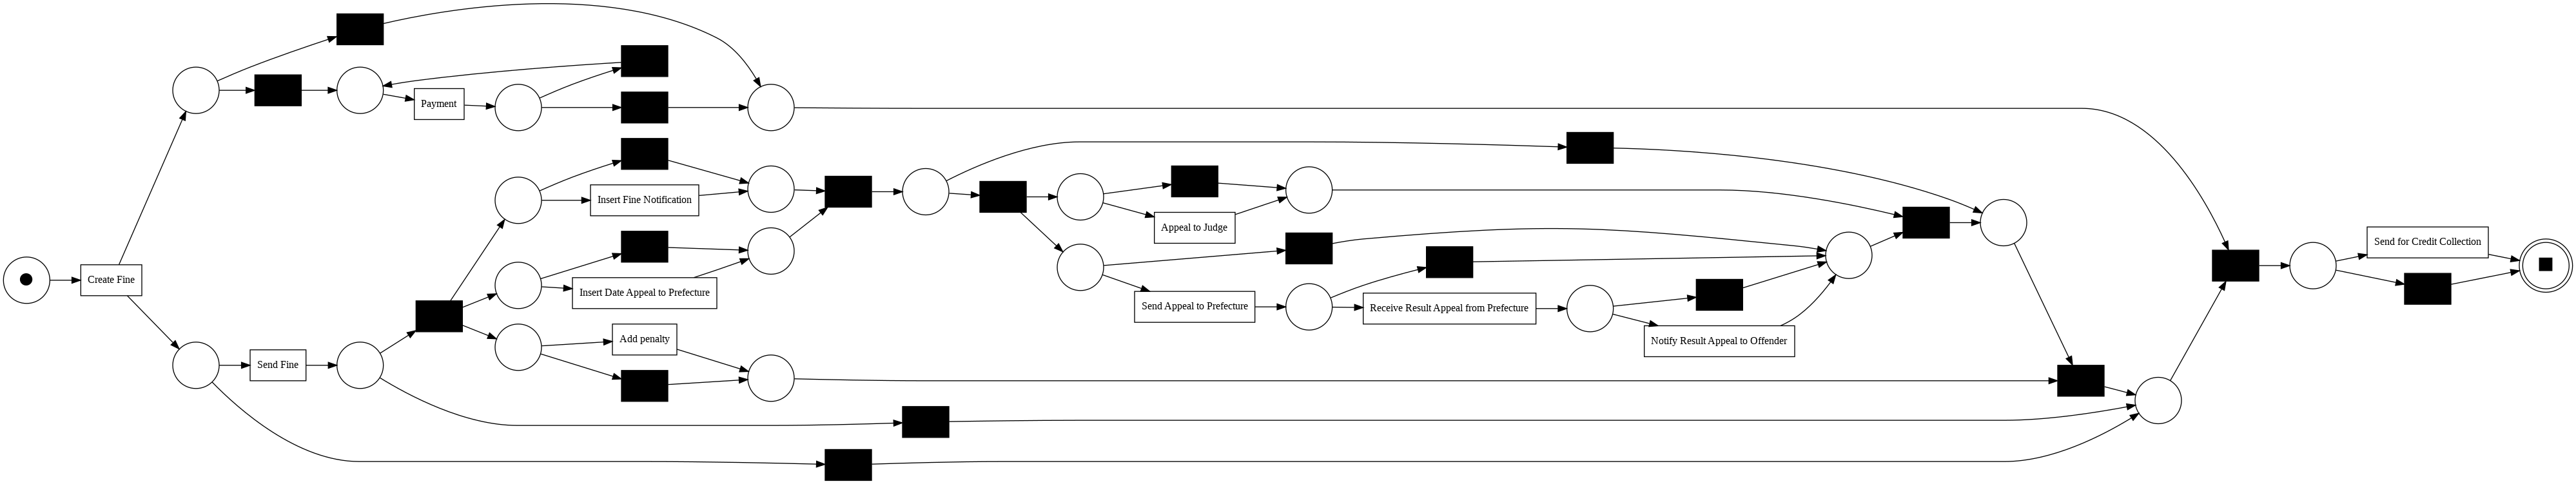

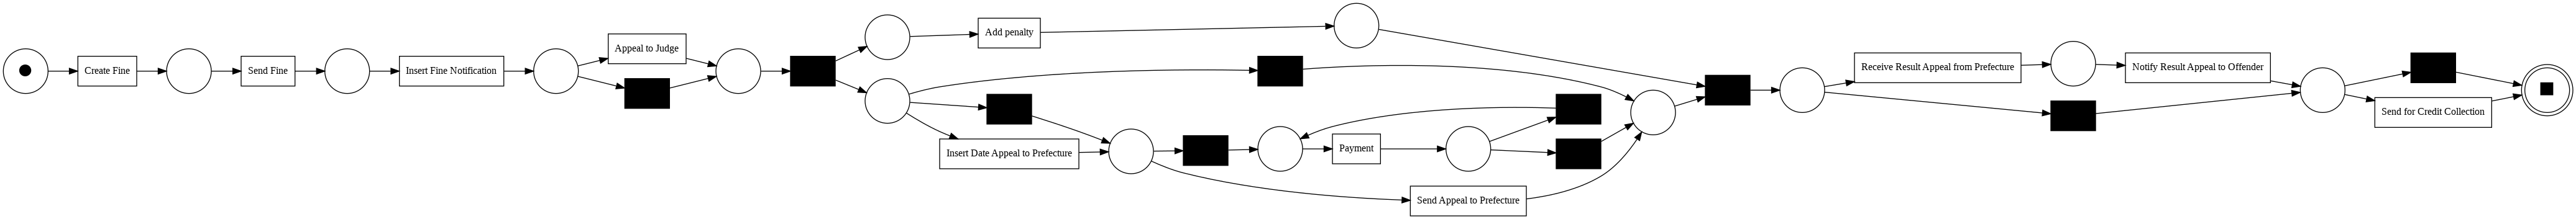

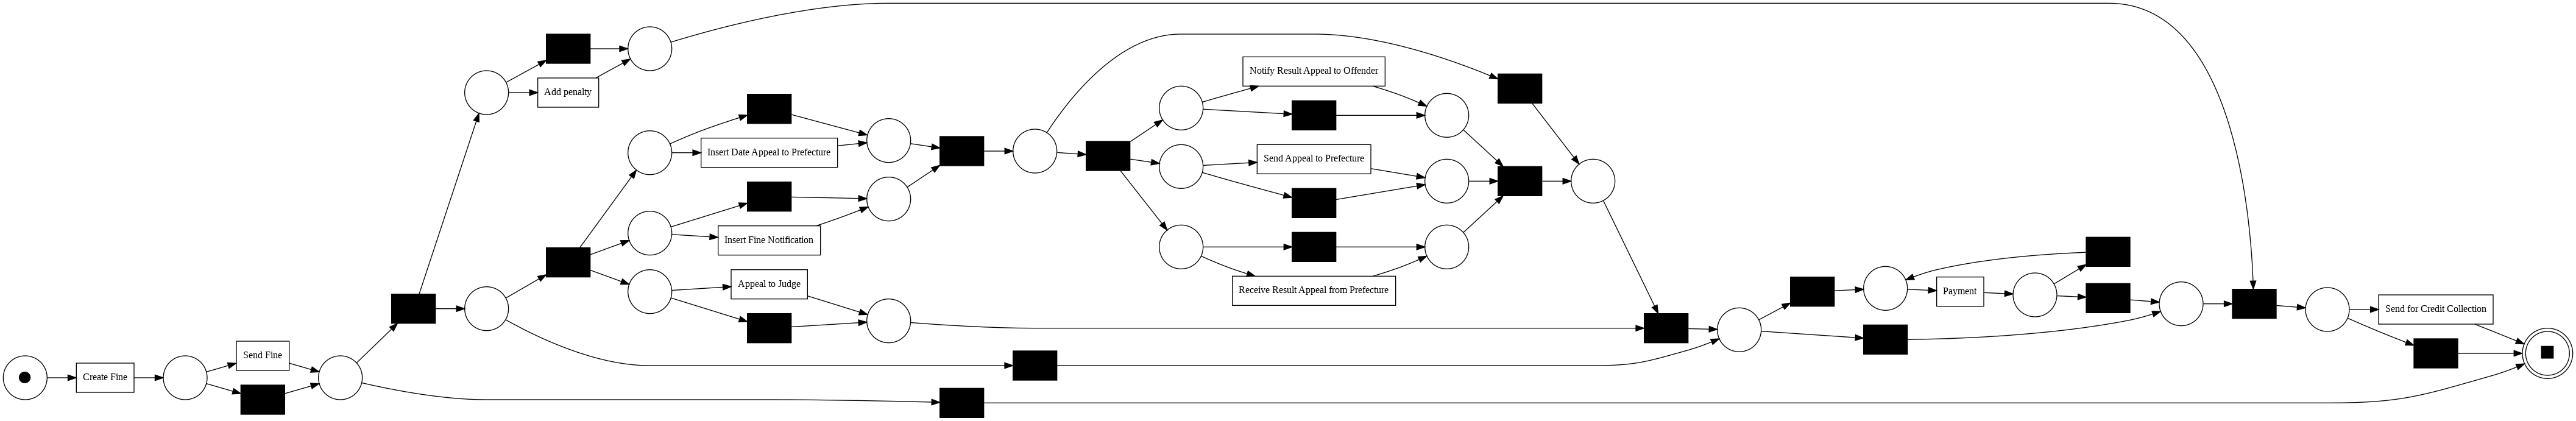

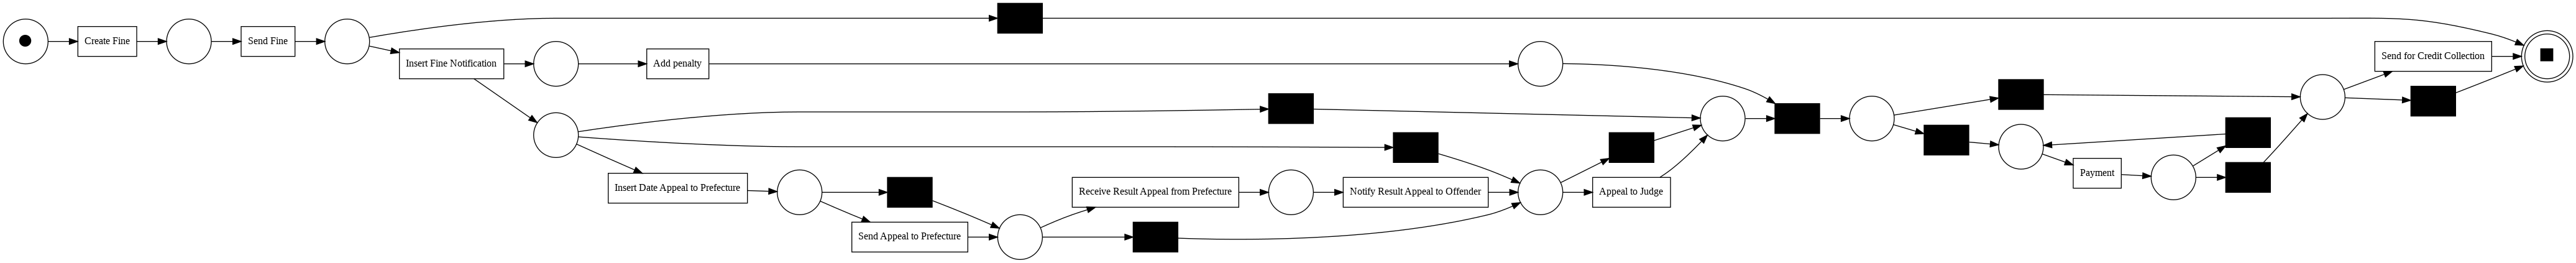

In [ ]:
for event_log in event_log_cluster:
  tree = pm4py.discover_process_tree_inductive(event_log)
  net, im, fm = pm4py.convert_to_petri_net(tree)
  pm4py.vis.view_petri_net(net, im, fm)

In [ ]:
results_df

,cluster,fitness,precision,generalization,simplicity
0,cluster_0,"{'perc_fit_traces': 100.0, 'average_trace_fitn...",0.829235,0.897398,0.680000
1,cluster_3,"{'perc_fit_traces': 100.0, 'average_trace_fitn...",0.617987,0.954986,0.638095
2,cluster_2,"{'perc_fit_traces': 100.0, 'average_trace_fitn...",0.507274,0.713853,0.655172
3,cluster_1,"{'perc_fit_traces': 100.0, 'average_trace_fitn...",0.414030,0.889836,0.610390
4,cluster_7,"{'perc_fit_traces': 100.0, 'average_trace_fitn...",0.621628,0.829578,0.636364
5,cluster_5,"{'perc_fit_traces': 100.0, 'average_trace_fitn...",0.802045,0.830620,0.725490
6,cluster_4,"{'perc_fit_traces': 100.0, 'average_trace_fitn...",0.412882,0.841403,0.625000
7,cluster_6,"{'perc_fit_traces': 100.0, 'average_trace_fitn...",0.893550,0.772270,0.684211


In [ ]:
# prompt: count the average of fitness, generalization, precision, and simplicity


average_precision = results_df['precision'].mean()
average_generalization = results_df['generalization'].mean()
average_simplicity = results_df['simplicity'].mean()


print(f"Average Precision: {average_precision}")
print(f"Average Generalization: {average_generalization}")
print(f"Average Simplicity: {average_simplicity}")

Average Precision: 0.6373288448944473
Average Generalization: 0.8412429650101412
Average Simplicity: 0.6568402026294762


In [ ]:
results_df['fitness'][1]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

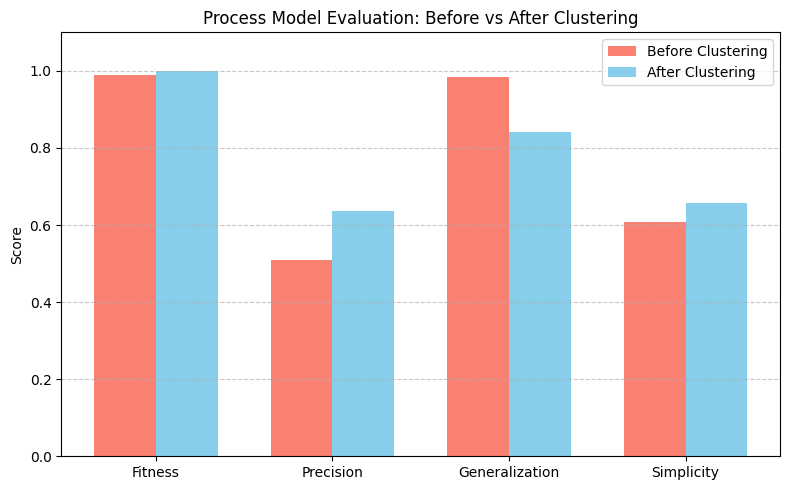

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data metrik
metrics = ["fitness","precision", "generalization", "simplicity"]
before = [0.99,0.5081863134118796, 0.9833127100418838,0.6086956521739131]     # Sebelum clustering
after = [1,0.6373288448944473,0.8412429650101412, 0.6568402026294762]      # Setelah clustering (rata-rata dari semua cluster)

# Setup sumbu X
x = np.arange(len(metrics))
width = 0.35

# Buat plot
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, before, width, label='Before Clustering', color='salmon')
plt.bar(x + width/2, after, width, label='After Clustering', color='skyblue')

# Labeling
plt.ylabel('Score')
plt.title('Process Model Evaluation: Before vs After Clustering')
plt.xticks(x, [m.capitalize() for m in metrics])
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()
